# Comparison of Classification Algorithms

## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

### Importing Iris Dataset

In [2]:
#data=pd.read_csv('ex2data2.txt',header=None)
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]
# print(X,X.shape)
# print(y,y.shape)

In [6]:
y=y.astype('category')
y=y.cat.codes


### Plotting of Original Dataset

Text(0, 0.5, 'sepal_width')

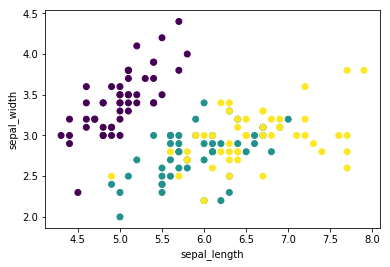

In [7]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

### Mixing Iris Setosa and Iris Virginica Classes

In [8]:
y=y.apply(lambda x:x if x==1 else 0)

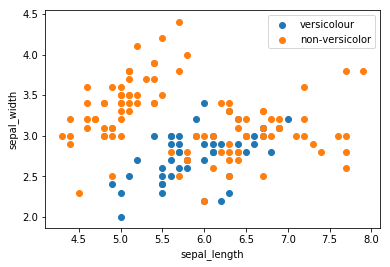

In [9]:
plt.scatter(X.iloc[:,0][y==1],X.iloc[:,1][y==1],label='versicolour')
plt.scatter(X.iloc[:,0][y==0],X.iloc[:,1][y==0],label='non-versicolor')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [10]:
m=len(y)
X=np.hstack((np.ones((m,1)),X))
y=y[:,np.newaxis]
theta=np.zeros((X.shape[1],1))


### Sigmoid Function and Cost Function

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [12]:
def computeCost(theta,X,y):
    return ((-1)/m)*np.sum(np.multiply(y,np.log(sigmoid(np.dot(X,theta))))+np.multiply((1-y),np.log(1-(sigmoid(np.dot(X,theta))))))

### Gradient Descent

In [13]:
alpha=0.02
iterations=100000
def gradDescent(X,y,theta,alpha,iterations):
    for i in range(iterations):
        theta=theta-(alpha/m)*np.dot(X.T,sigmoid(np.dot(X,theta))-y)
    return theta
theta=gradDescent(X,y,theta,alpha,iterations)    
print(theta)
J=computeCost(theta,X,y)
print(J)


[[ 7.39247527]
 [ 0.17320387]
 [-3.06381567]]
0.5057928592545703


### Plotting Decision Boundary

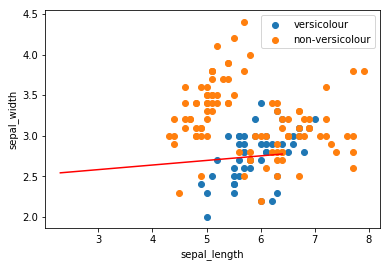

In [14]:
plt.scatter(X[:,1][y.flatten()==1],X[:,2][y.flatten()==1],label='versicolour')
plt.scatter(X[:,1][y.flatten()==0],X[:,2][y.flatten()==0],label='non-versicolour')
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta[2][0]*(theta[0][0] 
          + np.dot(theta[1][0],plot_x))  
decision_boun = plt.plot(plot_x, plot_y,color='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()


In [15]:
pred=sigmoid(np.dot(X,theta))>=0.5


In [16]:
accuracy=np.mean(pred==y)*100
print(accuracy)


71.33333333333334


## Regularized Logistic Regression

In [17]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]

In [18]:
y=y.astype('category')
y=y.cat.codes
y=y.apply(lambda x:x if x==1 else 0)


### Generating Features

In [19]:
def mapFeature(x1,x2):
    degree=6
    out=np.ones((X.shape[0],1))
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,np.multiply(np.power(x1,i-j),np.power(x2,j))[:,np.newaxis]))
    return out
X=mapFeature(X.iloc[:,0],X.iloc[:,1])

### Cost Function and Gradient Descent

In [20]:
def costFunction(theta,X,y,labda):
    return ((-1/m)*(y.T@np.log(sigmoid(X@theta))+(1-y.T)@np.log(1-sigmoid(X@theta)))+(labda/(2*m))*(theta[1:].T@theta[1:]))

In [21]:
m=len(y)
y=y[:,np.newaxis]
theta=np.zeros((X.shape[1],1))
lmbda=1
costFunction(theta,X,y,lmbda)

array([[0.69314718]])

In [22]:
def gradient(theta,X,y,labda):
    grad=(1/m)*(X.T@(sigmoid(X@theta)-y))
    grad[1:]=grad[1:]+(labda/m)*theta[1:]
    return grad


In [23]:
output=opt.fmin_tnc(func=costFunction,x0=theta.flatten(),fprime=gradient,args=(X,y.flatten(),lmbda))
theta=output[0]
print(theta)

[-8.35755099e+00  9.66383323e-02 -3.33795663e-02  8.36080010e-01
 -2.30379311e-01 -1.44699934e-01  6.41158522e-02  2.52310228e-02
 -1.58823744e-01 -6.08858763e-01 -8.21646470e-03 -6.86199138e-03
  2.50104670e-02  8.08225032e-02 -1.20793276e-01 -5.81683189e-03
 -3.85179055e-03  8.47091750e-04  2.06926637e-02  6.01053943e-02
  1.31264386e-02  4.55623573e-04  2.06792557e-03 -5.12715951e-03
 -2.34554549e-03  5.53033742e-03  1.23009771e-02 -3.83361768e-02]


In [24]:
pred=sigmoid(X@theta)>=0.5


In [25]:
pred
np.mean(pred==y.flatten())*100

80.0

### Plotting Final Decision Boundary

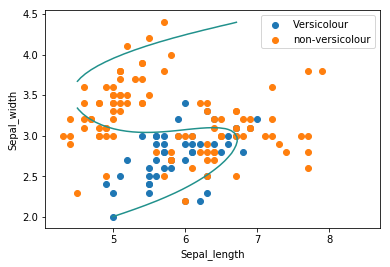

In [26]:
u = np.linspace(4.5,8.7, 50)
v = np.linspace(2.0, 4.4, 50)
#u = np.linspace(1,7, 50)
#v = np.linspace(0.1, 2.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.flatten() == 1
X = data.iloc[:,0:2]
passed = plt.scatter(X.iloc[:,0][mask], X.iloc[:,1][mask])
failed = plt.scatter(X.iloc[:,0][~mask], X.iloc[:,1][~mask])
plt.contour(u,v,z,0)
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend((passed, failed), ('Versicolour', 'non-versicolour'))
plt.show()

## SVM

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [28]:
from sklearn.svm import SVC
model=SVC()

In [29]:
model.fit(X_train,y_train)
pred=model.predict(X_test)

c:\users\aditya\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aditya\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.77      0.67      0.71        15

   micro avg       0.82      0.82      0.82        45
   macro avg       0.81      0.78      0.79        45
weighted avg       0.82      0.82      0.82        45

